<h1>Analizando algoritmos de ordenamiento</h1>

In [1]:
import math
import numpy as np
import matplotlib.pyplot as pl
import time
%matplotlib inline

<h2>Problema de ordenamiento</h2>

Input:  $A[1..n] = <a_1,a_2\ldots, a_n>$

Output: $A'[1..n] = <a'_1,a'_2\ldots, a'_n> : a'_1\leq a'_2 \leq \ldots \leq  a'_n$

<h3> Ordenamiento por inserción </h3>

In [2]:
def insertion_sort(A):
    j = 1
    while j < len(A):
        key = A[j]
        i = j - 1
        while (i >= 0) and (A[i] > key):
            A[i + 1] = A[i]
            i = i -1
        A[i + 1] = key
        j = j + 1

In [3]:
B = np.random.permutation(range(0,10))
print B
insertion_sort(B)
print B

[2 8 1 7 9 0 4 5 6 3]
[0 1 2 3 4 5 6 7 8 9]


<h4>Correctitud</h4>

<b>Invariante:</b> Al comienzo de cada iteración del ciclo externo el subarreglo $A[0..j-1]$ consiste de los elementos originalmente en $A[0..j-1]$ pero ordenados.

In [4]:
def invariant(A, original_A):
    l1 = list(A)
    l2 = list(original_A)
    l2.sort()
    return l1 == l2

In [5]:
print invariant([1, 2, 3, 4], [4, 3, 2, 1])
print invariant([1, 2, 3, 4], [5, 3, 2, 1])

True
False


Algoritmo de ordenamiento por inserción incluyendo evaluación de la invariante (inicialización, mantenimiento, terminación)

In [6]:
def right_insertion_sort(A):
    original_A = list(A)
    j = 1
    assert invariant(A[0:j], original_A[0:j])
    while j < len(A):
        assert invariant(A[0:j], original_A[0:j])
        key = A[j]
        i = j - 1
        while (i >= 0) and (A[i] > key):
            A[i + 1] = A[i]
            i = i -1        
        A[i + 1] = key
        j = j + 1
    assert invariant(A[0:j], original_A[0:j])

In [7]:
B = [5, 4, 6, 3, 7, 2, 8, 1, 9]
right_insertion_sort(B)
print B

[1, 2, 3, 4, 5, 6, 7, 8, 9]


La siguiente función incluye un error, por lo tanto la aserción para comprobar el invariante de ciclo falla. Esto genera una excepción que es capturada para imprimir un mensaje y el estado de las variables.

In [8]:
def wrong_insertion_sort(A):
    original_A = list(A)
    j = 1
    try:
        assert invariant(A[0:j], original_A[0:j])
        while j < len(A):
            assert invariant(A[0:j], original_A[0:j])
            key = A[j]
            i = j - 1
            while (i >= 0) and (A[i] < key):
                A[i + 1] = A[i]
                i = i - 1        
            A[i + 1] = key
            j = j + 1
        assert invariant(A[0:j], original_A[0:j])
    except  AssertionError:
        print "Error en el invariante de ciclo!"
        print "j=", j
        print "i=", i
        print "A=", A
        print "Original A=", original_A

In [9]:
B = [5, 4, 6, 3, 7, 2, 8, 1, 9]
wrong_insertion_sort(B)

Error en el invariante de ciclo!
j= 2
i= 0
A= [5, 4, 6, 3, 7, 2, 8, 1, 9]
Original A= [5, 4, 6, 3, 7, 2, 8, 1, 9]


<h4> Análisis del tiempo de ejecución</h4>

In [10]:
class Counter:
    '''
    Class Counter
    Implements a step counter, which is used to compute the number of basic operations performed in
    a particular call to a function.
    '''
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print "Number of steps =", self.steps
        
def acct_insertion_sort(A, acct):
    j = 1; acct.count()
    acct.count()
    while j < len(A):
        acct.count()
        key = A[j]; acct.count()
        i = j - 1; acct.count()
        acct.count()
        while (i >= 0) and (A[i] > key):
            acct.count()
            A[i + 1] = A[i]; acct.count()
            i = i -1; acct.count()
        A[i + 1] = key; acct.count()
        j = j + 1; acct.count()

In [11]:
B = np.random.permutation(range(0,10))
print ("Arreglo desordenado: ", B.tolist())
acct = Counter()
acct_insertion_sort(B, acct)
acct.print_steps()
print ("Arreglo desordenado: ", B.tolist())

('Arreglo desordenado: ', [8, 3, 9, 1, 0, 4, 5, 6, 7, 2])
Number of steps = 125
('Arreglo desordenado: ', [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


<h4>Análisis experimental</h4>
Ahora vamos a analizar el comportamiento del algoritmo cuando el tamaño de la entrada varía. La siguiente función genera arreglos al azar de tamaño 1 a n, llama la función acct_insertion_sort(l, acct) y contabiliza el número de pasos.

In [12]:
import random as rnd

def exper_analysisInsert(n):
    steps = []
    timeP = []
    t_n = []
    acct = Counter()
    for i in range(n):
        l = range(i)
        rnd.shuffle(l)
        acct.reset()
        tic = time.clock()
        acct_insertion_sort(l, acct)
        toc = time.clock()
        timeP.append(toc - tic)
        steps.append(acct.steps)
        t_n.append(math.pow(i, 2))
        
    results = [steps, timeP, t_n]
    return results

In [13]:
print exper_analysisInsert(10)

[[2, 2, 8, 20, 32, 44, 59, 62, 92, 98], [2.765427728706799e-06, 1.1851833123029148e-06, 5.530855457413602e-06, 1.1061710914827198e-05, 1.698762747634178e-05, 1.817281078864468e-05, 1.7382688580442737e-05, 1.7777749684543708e-05, 2.686415507886604e-05, 2.8444399495269928e-05], [0.0, 1.0, 4.0, 9.0, 16.0, 25.0, 36.0, 49.0, 64.0, 81.0]]


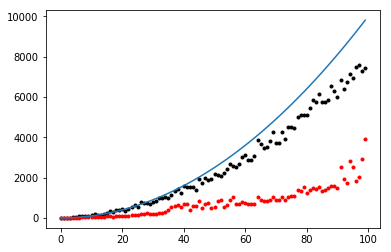

In [14]:
pl.clf()
x = np.arange(100)
res = exper_analysisInsert(100)
p = np.array(res[0])                #-> Arreglo con la cantidad de procesos realizados para cada arreglo (Negro)
t = np.array(res[1]) * 1000000      #-> Arreglo de tiempos de ejecucion en el ordenamiento de cada arreglo (Rojo)
n = np.array(res[2])                #-> Puntos de la complejidad en el peor de los casos del algoritmo (Azul)

pl.plot(x, p, 'k.', t, 'r.', n, '')

#Actividad
 <ol>
  <li>En una sola gráfica represente el número de operaciones, tiempo y T(n) que el algoritmo de ordenamiento por inserción requiere para ordenar arreglos de tamaño n (varie n) en el peor de los casos.</li>
  <li>Replique los ejercicios realizados en este taller para el algoritmo de ordenamiento por mezclas (merge sort)</li>
  <li>Replique los ejercicios realizados en este taller para el algoritmo de ordenamiento quick-sort</li>
</ol> 

<h3> Ordenamiento QuickSort</h3>

<h4>Correctitud</h4>

<b>Invariante:</b> Exactamente antes de cambiar al pivote, este no puede ser mayo que los numeros a su izquierda del arreglo.

In [15]:
def invariantQuick(alist, pivotPos):
    for i in range(0, pivotPos):
        if(alist[i] > alist[pivotPos]):
            return False
    return True

Aplicación de la invariante en el algoritmo correcto

In [16]:
def quickSortRight(B):
    quickSortBegRight(B, 0, len(B)-1)

def quickSortBegRight(B, first, last):
    if first < last:
        pivot = procedureRight(B, first, last)
        quickSortBegRight(B, first, pivot-1)
        quickSortBegRight(B, pivot+1, last)
    return B

def procedureRight(B, first, last):
    pivot = B[first]
    left = first+1
    right = last
    done = False
    while not done:
        while left <= right and B[left] <= pivot:
            left = left + 1
        while B[right] >= pivot and right >=left:
            right = right -1
        if right < left:
            done= True
        else:
            temp=B[left]
            B[left]=B[right]
            B[right]=temp
            
    temp=B[first]
    B[first]=B[right]
    B[right]=temp
    assert invariantQuick(B, first)
    return right

In [17]:
B = [5, 4, 6, 3, 7, 2, 8, 1, 9]
quickSortRight(B)
print B

[1, 2, 3, 4, 5, 6, 7, 8, 9]


El siguiente algoritmo de ordenamiento Quick presenta un error (ordena de mayor a menor), lo cual hace que el invariante sea falso lanzando y capturando una excepción además de mostrara el arreglo en el momento del fallo.

In [18]:
def quickSortWrong(B): 
    quickSortBegWrong(B, 0, len(B)-1)
    
def quickSortBegWrong(B, first, last):
    try:
        if first < last:
            pivot = procedureWrong(B, first, last)
            quickSortBegWrong(B, first, pivot-1)
            quickSortBegWrong(B, pivot+1, last)
            
        return B
    
    except:
        print "Error..."
def procedureWrong(B, first, last):
    try:
        pivot = B[first]
        right = first+1
        left = last
        done = False
        while not done:
            while left <= right and B[left] <= pivot:
                left = left + 1
            while B[right] >= pivot and right >=left:
                right = right -1
            if right < left:
                done= True
            else:
                temp=B[left]
                B[left]=B[right]
                B[right]=temp

        temp=B[first]
        B[first]=B[right]
        B[right]=temp
        assert invariantQuick(B, first)
        
        return int(right)
    
    except  AssertionError:
        print "Error en el invariante de ciclo!"
        print "Pivote", pivot
        


In [19]:
B = [4, 5, 6, 3, 7, 2, 8, 1, 9]
quickSortWrong(B)

Error en el invariante de ciclo!
Pivote 6
Error...


In [20]:
def quickSort(alist, acct):
    quickSortBeg(alist, 0, len(alist)-1, acct)

def quickSortBeg(alist, first, last, acct):
    if first < last:
        acct.count()
        pivot = procedure(alist, first, last, acct); acct.count()
        quickSortBeg(alist, first, pivot-1, acct)
        quickSortBeg(alist, pivot+1, last, acct)
    return alist

def procedure(alist, first, last, acct):
    pivot = alist[first]; acct.count()
    left = first+1; acct.count()
    right = last; acct.count()
    done = False; acct.count()
    while not done:
        acct.count()
        while left <= right and alist[left] <= pivot:
            acct.count()
            left = left + 1; acct.count()
        while alist[right] >= pivot and right >=left:
            acct.count()
            right = right -1; acct.count()
        if right < left:
            acct.count()
            done= True; acct.count()
        else:
            temp=alist[left]; acct.count()
            alist[left]=alist[right]; acct.count()
            alist[right]=temp; acct.count()
            
    temp=alist[first]; acct.count()
    alist[first]=alist[right]; acct.count()
    alist[right]=temp; acct.count()
    return right

In [21]:
B = np.random.permutation(range(0,10))
print "Arreglo desordenado: ", B.tolist()
acct = Counter()
quickSort(B, acct)
acct.print_steps()
print "Arreglo ordenado: ", B.tolist()

Arreglo desordenado:  [2, 4, 1, 5, 7, 0, 8, 6, 3, 9]
Number of steps = 122
Arreglo ordenado:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


<h4>Análisis</h4>
Realiza la prueba del algoritmo n veces y guarda la cantidad de pasos realizados, los valores de su T(n) en el peor de los casos y el tiempo de ejecución

In [22]:
import random as rnd

def exper_analysisQuick(n):
    steps = []
    timeP = []
    t_n = []
    acct = Counter()
    for i in range(n):
        l = range(i)
        rnd.shuffle(l)
        acct.reset()
        tic = time.clock()
        quickSort(l, acct)
        toc = time.clock()
        timeP.append(toc - tic)
        steps.append(acct.steps)
        t_n.append(math.pow(i, 2))
        
    results = [steps, timeP, t_n]
    return results

In [23]:
print exper_analysisQuick(10)

[[0, 0, 14, 16, 48, 54, 74, 78, 88, 106], [1.9753055204851933e-06, 7.901222081052595e-07, 8.691344290268077e-06, 7.506160977888143e-06, 1.9753055205073977e-05, 2.21234218296118e-05, 3.081476611987988e-05, 3.160488832798514e-05, 3.911104930587328e-05, 4.5036965867550904e-05], [0.0, 1.0, 4.0, 9.0, 16.0, 25.0, 36.0, 49.0, 64.0, 81.0]]


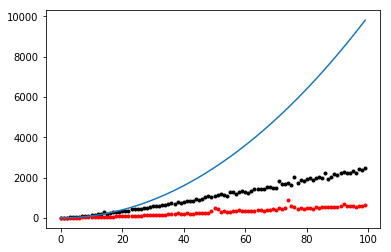

In [24]:
pl.clf()
x = np.arange(100)
res = exper_analysisQuick(100)
p = np.array(res[0])                #-> Arreglo con la cantidad de procesos realizados para cada arreglo (Negro)
t = np.array(res[1]) * 1000000      #-> Arreglo de tiempos de ejecucion en el ordenamiento de cada arreglo (Rojo)
n = np.array(res[2])                #-> Puntos de la complejidad en el peor de los casos del algoritmo (Azul)

pl.plot(x, p, 'k.', t, 'r.', n, '')

<h3> Ordenamiento MergeSort</h3>

<h4>Correctitud</h4>

<b>Invariante:</b> Una vez llegado al caso base, los subarreglos generados deberán estar ordenados.

In [25]:
def invariantMerge(subA):
    l1 = list(subA)
    l2 = list(subA)
    l2.sort()
    return l1 == l2

In [26]:
print invariantMerge([1, 2, 3, 4])
print invariantMerge([1, 3, 2, 4])

True
False


Aplicacion de la invariante en el algoritmo correcto

In [27]:
def mergeSortRight(B):
    if (len(B)>1):
        mid = len(B)//2
        lefthalf = B[:mid]
        righthalf = B[mid:]

        mergeSortRight(lefthalf)
        mergeSortRight(righthalf)

        i=0
        j=0
        k=0
        while (i < len(lefthalf) and j < len(righthalf)):
            if (lefthalf[i] < righthalf[j]):
                B[k]=lefthalf[i]
                assert invariantMerge(B[0:k])
                i=i+1
            else:
                B[k]=righthalf[j]
                assert invariantMerge(B[0:k])
                j=j+1
            k=k+1
        while (i < len(lefthalf)):
            B[k]=lefthalf[i]
            assert invariantMerge(B[0:k])
            i=i+1
            k=k+1

        while (j < len(righthalf)):
            B[k]=righthalf[j]
            assert invariantMerge(B[0:k])
            j=j+1
            k=k+1

In [28]:
B = [5, 4, 6, 3, 7, 2, 8, 1, 9]
mergeSortRight(B)
print B

[1, 2, 3, 4, 5, 6, 7, 8, 9]


El siguiente algoritmo de ordenamiento Merge presenta un error (ordena de mayor a menor), lo cual hace que el invariante sea falso lanzando y capturando una excepción además de mostrara el arreglo en el momento del fallo.

In [29]:
def mergeSortWrong(B):
    try:
        if (len(B)>1):
            mid = len(B)//2
            lefthalf = B[:mid]
            righthalf = B[mid:]

            mergeSortRight(lefthalf)
            mergeSortRight(righthalf)

            i=0
            j=0
            k=0
            while (i < len(lefthalf) and j < len(righthalf)):
                if (lefthalf[i] < righthalf[j]):
                    B[k]=righthalf[i]
                    assert invariantMerge(B[0:k])
                    i=i+1
                else:
                    B[k]=lefthalf[j]
                    assert invariantMerge(B[0:k])
                    j=j+1
                k=k+1
            while (i < len(lefthalf)):
                B[k]=righthalf[i]
                assert invariantMerge(B[0:k])
                i=i+1
                k=k+1

            while (j < len(righthalf)):
                B[k]=lefthalf[j]
                assert invariantMerge(B[0:k])
                j=j+1
                k=k+1           
    except  AssertionError:
        print "Error en el invariante de ciclo!"
        print "Sub Arreglo error: ", B[0:k]

In [30]:
B = [5, 4, 6, 3, 7, 2, 8, 1, 9]
mergeSortWrong(B)

Error en el invariante de ciclo!
Sub Arreglo error:  [3, 4, 1]


<h4>Análisis en tiempo de ejecución</h4>

In [31]:
def mergeSort(B, acct):
    if (len(B)>1):
        mid = len(B)//2; acct.count()
        lefthalf = B[:mid]; acct.count()
        righthalf = B[mid:]; acct.count()

        mergeSort(lefthalf, acct)
        mergeSort(righthalf, acct)

        i=0; acct.count()
        j=0; acct.count()
        k=0; acct.count()
        while (i < len(lefthalf) and j < len(righthalf)):
            acct.count()
            if (lefthalf[i] < righthalf[j]):
                acct.count()
                B[k]=lefthalf[i]; acct.count()
                i=i+1; acct.count()
            else:
                acct.count()
                B[k]=righthalf[j]; acct.count()
                j=j+1; acct.count()
            k=k+1; acct.count()
        while (i < len(lefthalf)):
            acct.count()
            B[k]=lefthalf[i]; acct.count()
            i=i+1; acct.count()
            k=k+1; acct.count()

        while (j < len(righthalf)):
            acct.count()
            B[k]=righthalf[j]; acct.count()
            j=j+1; acct.count()
            k=k+1; acct.count()

In [32]:
B = list(np.random.permutation(range(0,10)))
print "Arreglo desordenado: ", B
acct = Counter()
mergeSort(B, acct)
acct.print_steps()
print "Arreglo ordenado: ", B

Arreglo desordenado:  [6, 1, 8, 4, 7, 0, 9, 3, 2, 5]
Number of steps = 214
Arreglo ordenado:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


<h4>Análisis</h4>
Realiza la prueba del algoritmo n veces y guarda la cantidad de pasos realizados, los valores de su T(n) en el peor de los casos y el tiempo de ejecución

In [33]:
import random as rnd

def exper_analysisMerge(n):
    steps = []
    timeP = []
    t_n = []
    acct = Counter()
    for i in range(n):
        l = range(i)
        rnd.shuffle(l)
        acct.reset()
        tic = time.clock()
        mergeSort(l, acct)
        toc = time.clock()
        timeP.append(toc - tic)
        steps.append(acct.steps)
        if(i > 0):
            t_n.append((i)*math.log(i))
        
    results = [steps, timeP, t_n]
    return results

In [34]:
print exper_analysisMerge(10)

[[0, 0, 15, 35, 54, 80, 103, 129, 153, 181], [2.3703666247598676e-06, 3.9506110427467434e-07, 9.481466498151292e-06, 1.619750526815622e-05, 2.646909397485686e-05, 3.713574378538809e-05, 5.4123371261649567e-05, 5.53085545740295e-05, 5.451843236592424e-05, 5.096288242922853e-05], [0.0, 1.3862943611198906, 3.295836866004329, 5.545177444479562, 8.047189562170502, 10.75055681536833, 13.621371043387192, 16.635532333438686, 19.775021196025975]]


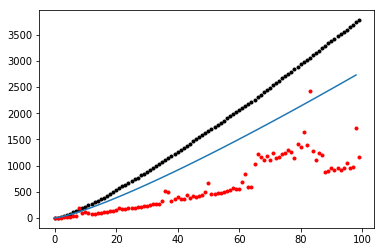

In [35]:
pl.clf()
x = np.arange(100)
res = exper_analysisMerge(100)
p = np.array(res[0])                #-> Arreglo con la cantidad de procesos realizados para cada arreglo (Negro)
t = np.array(res[1]) * 1000000      #-> Arreglo de tiempos de ejecucion en el ordenamiento de cada arreglo (Rojo)
n = np.array(res[2]) * 6            #-> Puntos de la complejidad en el peor de los casos del algoritmo (Azul)

pl.plot(x, p, 'k.', t, 'r.', n, '')